In [117]:
from util import ROC, plot_losses, read_datas_from_json, show_exp_result

In [24]:
import os

import torch

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

torch.cuda.set_device(2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device", di := torch.cuda.current_device(), torch.cuda.get_device_name(di))

device 2 NVIDIA GeForce RTX 2080 Ti


In [2]:
def ez_fn(main_path):
    print(main_path)
    data = read_datas_from_json(main_path)
    show_exp_result(data)
    plot_losses(data)

In [102]:
import model
from torchsummary import summary

# TWO
# summary( model.DLNN(2).cuda(), input_size=[ ( 1, 32, 118, 118 ), ( 1, 32, 32, 32 ) ] )
# summary( model.DualResNet(boxResNet=18, smlResNet=10, features=2, in_ch=1, ratio=3, base=4).cuda(), input_size=[ ( 1, 32, 118, 118 ), ( 1, 32, 32, 32 ) ] )
summary(
    model.DualResNet(
        boxResNet=18, smlResNet=18, features=2, in_ch=1, ratio=3, base=4
    ).cuda(),
    input_size=[(1, 32, 118, 118), (1, 32, 32, 32)],
)
# CEN
# summary(model.BOXNN(2).cuda(), input_size=(1, 32, 118, 118))
# summary(model.generate_ResNet(10, n_input_channels=1, n_classes=2).cuda(), input_size=(1, 32, 118, 118))
# summary(model.generate_ResNet(18, n_input_channels=1, n_classes=2).cuda(), input_size=(1, 32, 118, 118))
# FULL
# summary(model.SMLNN(2).cuda(), input_size=(1, 32, 32, 32))
# summary(model.generate_ResNet(10, n_input_channels=1, n_classes=2).cuda(), input_size=(1, 32, 32, 32))
# summary(model.generate_ResNet(18, n_input_channels=1, n_classes=2).cuda(), input_size=(1, 32, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 64, 32, 59, 59]          21,952
       BatchNorm3d-2       [-1, 64, 32, 59, 59]             128
              ReLU-3       [-1, 64, 32, 59, 59]               0
         MaxPool3d-4       [-1, 64, 16, 30, 30]               0
            Conv3d-5       [-1, 64, 16, 30, 30]         110,592
       BatchNorm3d-6       [-1, 64, 16, 30, 30]             128
              ReLU-7       [-1, 64, 16, 30, 30]               0
            Conv3d-8       [-1, 64, 16, 30, 30]         110,592
       BatchNorm3d-9       [-1, 64, 16, 30, 30]             128
             ReLU-10       [-1, 64, 16, 30, 30]               0
       BasicBlock-11       [-1, 64, 16, 30, 30]               0
           Conv3d-12       [-1, 64, 16, 30, 30]         110,592
      BatchNorm3d-13       [-1, 64, 16, 30, 30]             128
             ReLU-14       [-1, 64, 16,

In [103]:
328.9 + 253.02 + 1.7 + 0.12

583.74

In [104]:
from thop import profile

data = [
    (torch.randn(16, 1, 32, 118, 118),),
    (torch.randn(16, 1, 32, 32, 32),),
    (
        torch.randn(16, 1, 32, 118, 118),
        torch.randn(16, 1, 32, 32, 32),
    ),
]

# flops, params = profile(model.BOXNN(2), inputs=data[0])
# flops, params = profile(model.SMLNN(2), inputs=data[1])
# flops, params = profile(model.DLNN(2), inputs=data[2])
# flops, params = profile(model.generate_ResNet(18, n_input_channels=1, n_classes=2), inputs=data[0])
flops, params = profile(
    model.DualResNet(boxResNet=18, smlResNet=18, features=2, in_ch=1, ratio=3, base=4),
    inputs=data[2],
)
print(f"FLOPs  = {flops/1000**3:10.4f} GFLOPs")
print(f"Params = {params/1000**2:10.4f} MB")

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv3d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm3d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool3d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool3d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
FLOPs  =   240.6779 GFLOPs
Params =    66.3282 MB


./tmp/BoxNN_f2/no18_m4_b16_lr-3


AUC:

best of LNM @exp10-51
loss: 0.4645    LNM     ENE  
AUC         : 0.8048  0.7617 
Accuracy    : 0.8158  0.8158 
Sensitivity : 0.4348  0.4667 
Specificity : 0.9811  0.9016 
PPV         : 0.9091  0.5385 
NPV         : 0.8000  0.8730 

best of ENE @exp1-43
loss: 0.8543    LNM     ENE  
AUC         : 0.7334  0.8350 
Accuracy    : 0.6579  0.7632 
Sensitivity : 0.7391  0.8667 
Specificity : 0.6226  0.7377 
PPV         : 0.4595  0.4483 
NPV         : 0.8462  0.9574 

best of both @exp10-40
loss: 0.6721    LNM     ENE  
AUC         : 0.7744  0.8339 
Accuracy    : 0.7895  0.8289 
Sensitivity : 0.5652  0.6667 
Specificity : 0.8868  0.8689 
PPV         : 0.6842  0.5556 
NPV         : 0.8246  0.9138 

Mean of best AUC during 10 exps
loss: 0.7519    LNM     ENE  
AUC         : 0.7657  0.7765 
Accuracy    : 0.7447  0.7289 
Sensitivity : 0.6029  0.7000 
Specificity : 0.8063  0.7361 
PPV         : 0.6328  0.4208 
NPV         : 0.8278  0.9138 



Accuracy:

best 

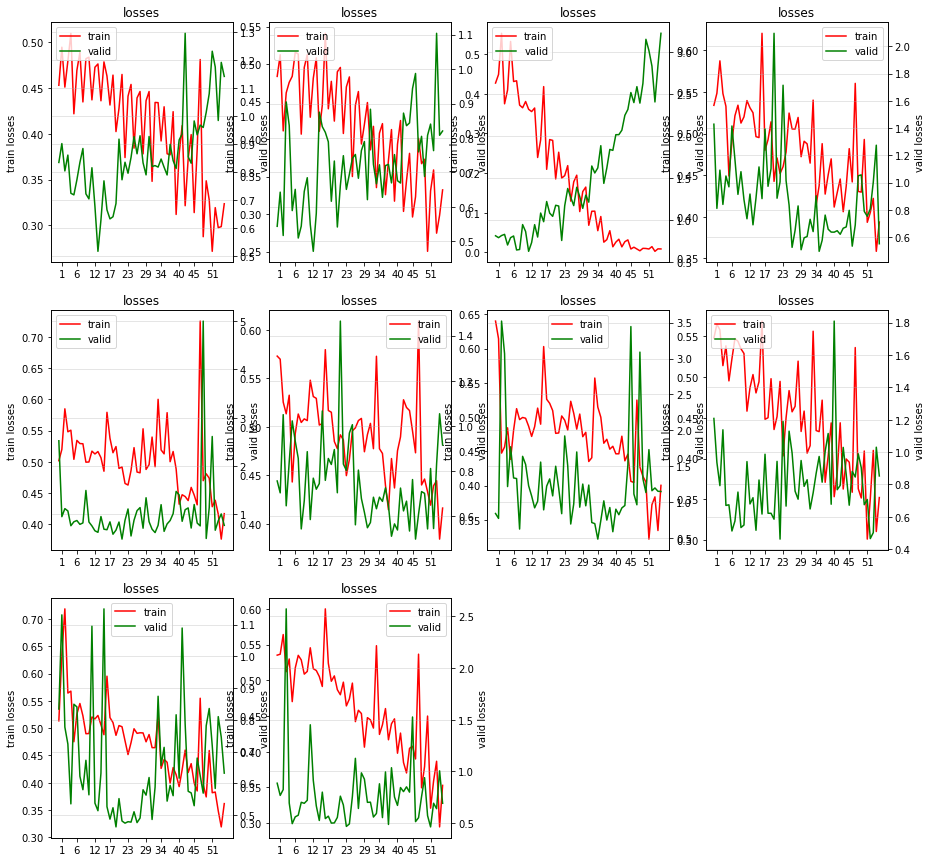

In [55]:
# BoxNet feature=2 no 2018 dataset multiple=4 batch=16 learningRate=1e-3 maxEpoch=10
ez_fn("./tmp/BoxNN_f2/no18_m4_b16_lr-3")  # DONE
# Best AUC         : 0.7744  0.8339
# Mean AUC         : 0.7657  0.7765
# Estimated Total Size (MB): 564.36
# FLOPs  =   337.9884 GFLOPs
# Params =    34.4835 MB

./tmp/SmlNet_f2_full/no18_m4_b16_lr5e4_97-15


AUC:

best of LNM @exp5-9
loss: 1.0185    LNM     ENE  
AUC         : 0.8335  0.8426 
Accuracy    : 0.7763  0.7368 
Sensitivity : 0.7826  0.8000 
Specificity : 0.7736  0.7213 
PPV         : 0.6000  0.4138 
NPV         : 0.8913  0.9362 

best of ENE @exp5-29
loss:37.2580    LNM     ENE  
AUC         : 0.8007  0.8590 
Accuracy    : 0.6842  0.7105 
Sensitivity : 0.8696  0.9333 
Specificity : 0.6038  0.6557 
PPV         : 0.4878  0.4000 
NPV         : 0.9143  0.9756 

best of both @exp5-12
loss: 3.6130    LNM     ENE  
AUC         : 0.8285  0.8579 
Accuracy    : 0.7763  0.7895 
Sensitivity : 0.6957  0.7333 
Specificity : 0.8113  0.8033 
PPV         : 0.6154  0.4783 
NPV         : 0.8600  0.9245 

Mean of best AUC during 10 exps
loss: 4.4717    LNM     ENE  
AUC         : 0.8049  0.8012 
Accuracy    : 0.7398  0.7310 
Sensitivity : 0.7391  0.7556 
Specificity : 0.7401  0.7249 
PPV         : 0.5742  0.4322 
NPV         : 0.8737  0.9313 



Accura

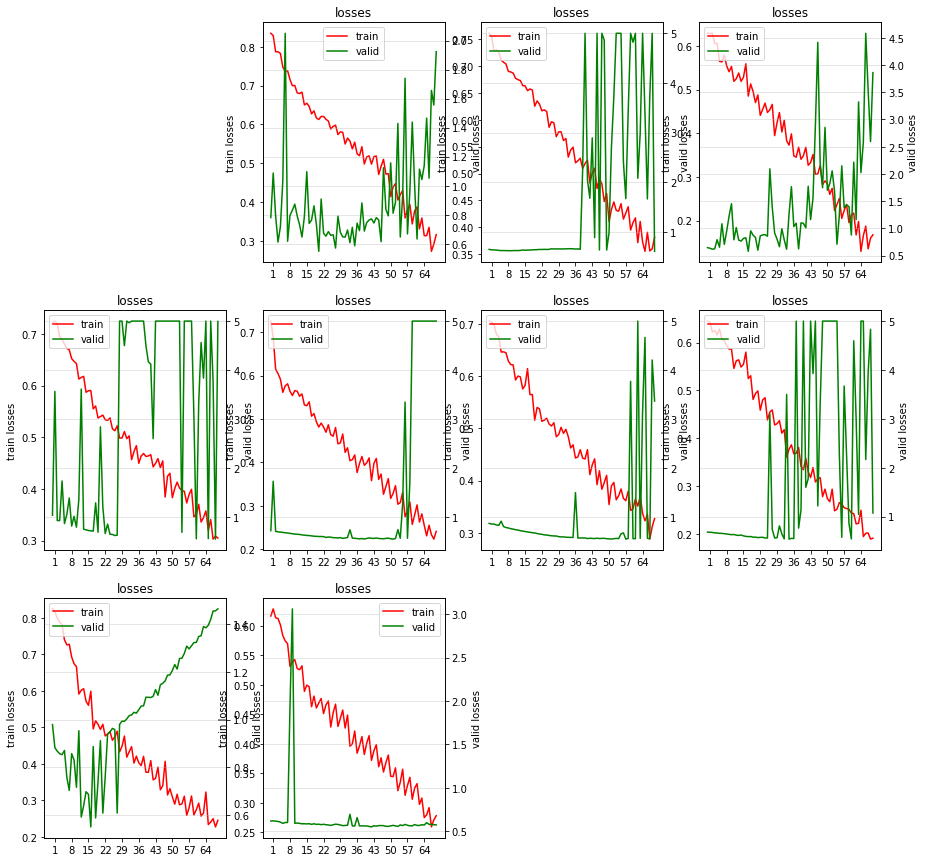

In [56]:
# SmlNet feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=10 hu=820~1120
ez_fn("./tmp/SmlNet_f2_full/no18_m4_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8285  0.8579
# Mean AUC         : 0.8049  0.8012
# Total params: 14,384,773
# Estimated Total Size (MB): 90.66
# FLOPs  =    47.6104 GFLOPs
# Params =    14.3841 MB

./tmp/DualNet/no18_m4_b16_lr5e4_97-15


AUC:

best of LNM @exp2-43
loss: 0.8456    LNM     ENE  
AUC         : 0.8655  0.8273 
Accuracy    : 0.7763  0.7105 
Sensitivity : 0.9130  0.8667 
Specificity : 0.7170  0.6721 
PPV         : 0.5833  0.3939 
NPV         : 0.9500  0.9535 

best of ENE @exp10-37
loss: 0.6420    LNM     ENE  
AUC         : 0.7990  0.8557 
Accuracy    : 0.8289  0.8289 
Sensitivity : 0.7391  0.8000 
Specificity : 0.8679  0.8361 
PPV         : 0.7083  0.5455 
NPV         : 0.8846  0.9444 

best of both @exp2-25
loss: 1.1691    LNM     ENE  
AUC         : 0.8450  0.8514 
Accuracy    : 0.7763  0.6842 
Sensitivity : 0.7826  0.8667 
Specificity : 0.7736  0.6393 
PPV         : 0.6000  0.3714 
NPV         : 0.8913  0.9512 

Mean of best AUC during 10 exps
loss: 1.2036    LNM     ENE  
AUC         : 0.7924  0.7853 
Accuracy    : 0.7355  0.6947 
Sensitivity : 0.7101  0.7844 
Specificity : 0.7465  0.6727 
PPV         : 0.5780  0.3856 
NPV         : 0.8628  0.9344 



Accuracy:



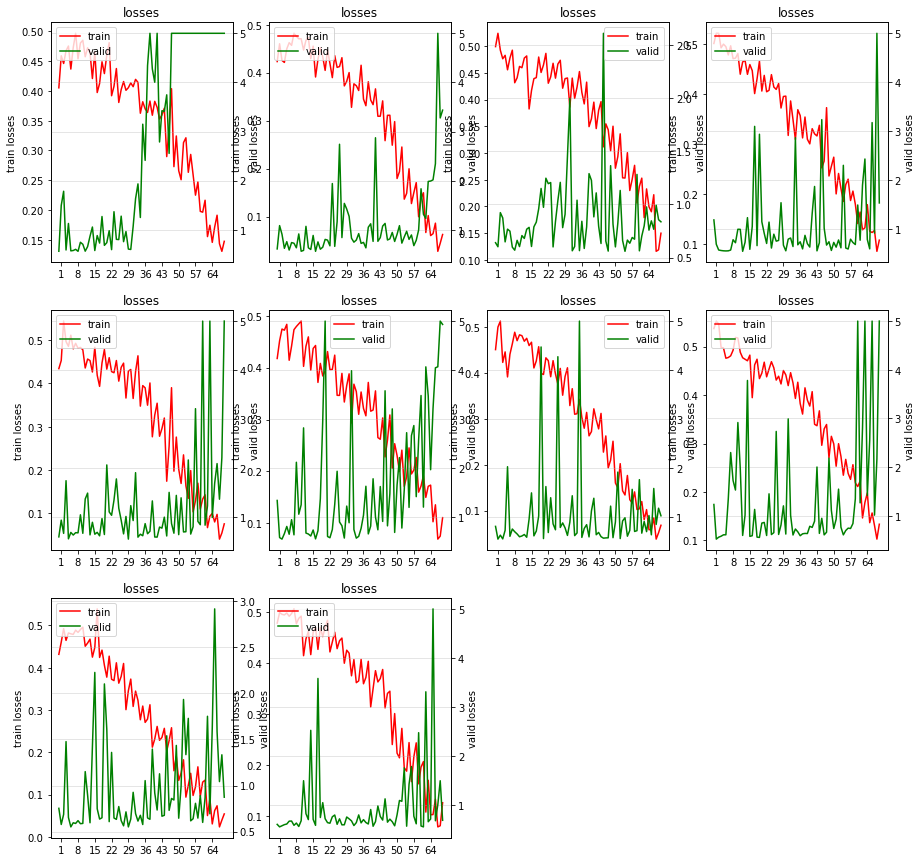

In [57]:
# DualNet feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=10 hu=820~1120
ez_fn("./tmp/DualNet/no18_m4_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8450  0.8514
# Mean AUC         : 0.7924  0.7853
# Total params: 48,872,866
# Estimated Total Size (MB): 655.02
# FLOPs  =   385.5988 GFLOPs
# Params =    35.3700 MB

./tmp/ResNet3D_10_full/E25_no18_m4_b16_lr5e4_97-15


AUC:

best of LNM @exp1-17
loss: 0.8542    LNM     ENE  
AUC         : 0.8433  0.8284 
Accuracy    : 0.7368  0.6711 
Sensitivity : 0.7826  0.8667 
Specificity : 0.7170  0.6230 
PPV         : 0.5455  0.3611 
NPV         : 0.8837  0.9500 

best of ENE @exp3-8
loss: 0.4546    LNM     ENE  
AUC         : 0.8203  0.8798 
Accuracy    : 0.7763  0.7895 
Sensitivity : 0.6957  0.8667 
Specificity : 0.8113  0.7705 
PPV         : 0.6154  0.4815 
NPV         : 0.8600  0.9592 

best of both @exp3-8
loss: 0.4546    LNM     ENE  
AUC         : 0.8203  0.8798 
Accuracy    : 0.7763  0.7895 
Sensitivity : 0.6957  0.8667 
Specificity : 0.8113  0.7705 
PPV         : 0.6154  0.4815 
NPV         : 0.8600  0.9592 

Mean of best AUC during 10 exps
loss: 0.8139    LNM     ENE  
AUC         : 0.8222  0.8393 
Accuracy    : 0.7383  0.7076 
Sensitivity : 0.7633  0.8593 
Specificity : 0.7275  0.6703 
PPV         : 0.5557  0.3997 
NPV         : 0.8778  0.9503 



A

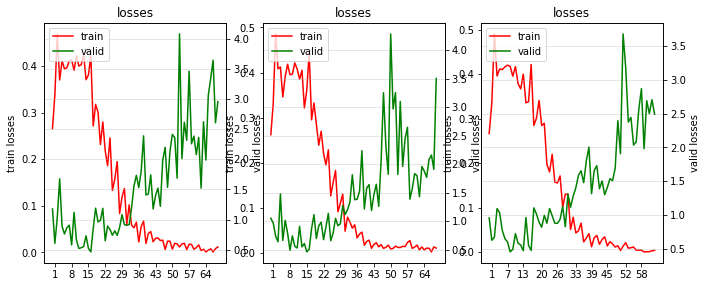

In [58]:
# ResNet3D_10 full tumor feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=25 hu=820~1120
ez_fn("./tmp/ResNet3D_10_full/E25_no18_m4_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8203  0.8798
# Mean AUC         : 0.8222  0.8393
# Total params: 14,356,546
# Estimated Total Size (MB): 72.37
# FLOPs  =     8.9548 GFLOPs
# Params =    14.3565 MB

./tmp/ResNet3D_10_cen/1E25_no18_m4_b16_lr5e4_97-15


AUC:

best of LNM @exp6-34
loss: 0.7440    LNM     ENE  
AUC         : 0.9007  0.7934 
Accuracy    : 0.8816  0.8421 
Sensitivity : 0.7826  0.5333 
Specificity : 0.9245  0.9180 
PPV         : 0.8182  0.6154 
NPV         : 0.9074  0.8889 

best of ENE @exp8-40
loss: 0.5593    LNM     ENE  
AUC         : 0.7900  0.8699 
Accuracy    : 0.8026  0.8026 
Sensitivity : 0.4783  0.8667 
Specificity : 0.9434  0.7869 
PPV         : 0.7857  0.5000 
NPV         : 0.8065  0.9600 

best of both @exp10-46
loss: 0.7331    LNM     ENE  
AUC         : 0.8589  0.8514 
Accuracy    : 0.7632  0.8421 
Sensitivity : 0.7826  0.8000 
Specificity : 0.7547  0.8525 
PPV         : 0.5806  0.5714 
NPV         : 0.8889  0.9455 

Mean of best AUC during 10 exps
loss: 1.1421    LNM     ENE  
AUC         : 0.8430  0.8256 
Accuracy    : 0.7750  0.7566 
Sensitivity : 0.7304  0.7778 
Specificity : 0.7943  0.7514 
PPV         : 0.6228  0.4457 
NPV         : 0.8757  0.9339 



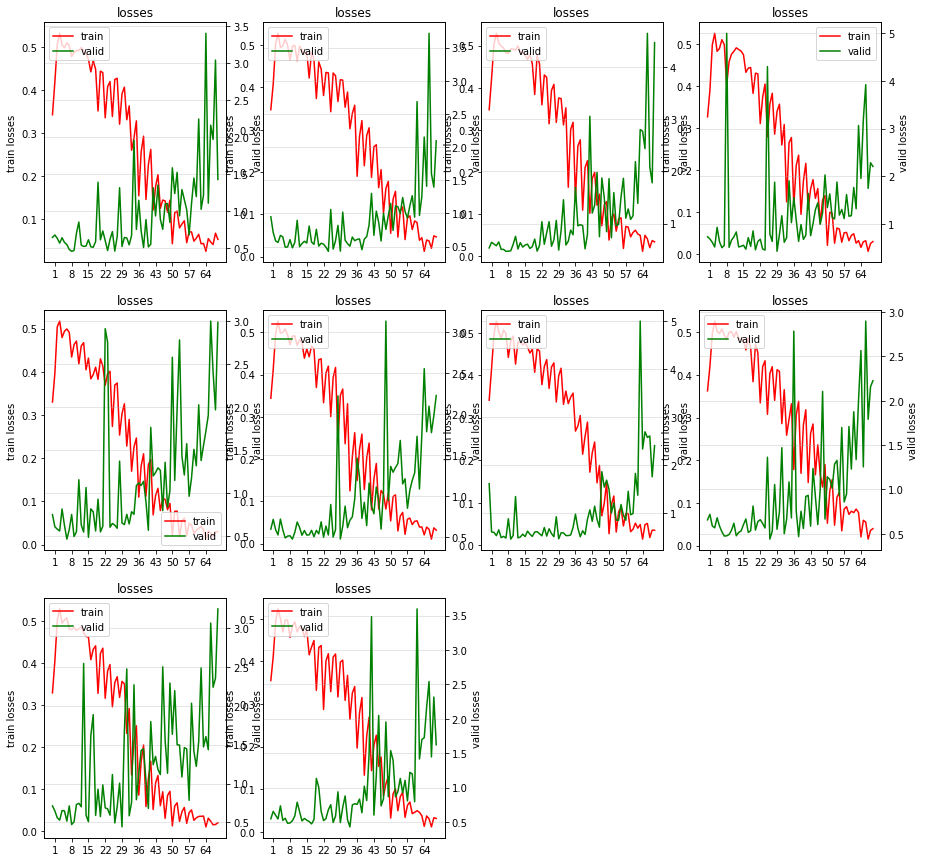

In [84]:
# ResNet3D_10 cen tumor feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=25 hu=820~1120
ez_fn("./tmp/ResNet3D_10_cen/1E25_no18_m4_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8589  0.8514
# Mean AUC         : 0.8430  0.8256
# Total params: 14,356,546
# Estimated Total Size (MB): 297.34
# FLOPs  =   126.5747 GFLOPs
# Params =    14.3565 MB

./tmp/ResNet3D_10_cen/E25_no18_noExt_m4_b16_lr5e4_97-15


AUC:

best of LNM @exp7-50
loss: 0.7642    LNM     ENE  
AUC         : 0.8384  0.7858 
Accuracy    : 0.8026  0.6316 
Sensitivity : 0.7826  0.8000 
Specificity : 0.8113  0.5902 
PPV         : 0.6429  0.3243 
NPV         : 0.8958  0.9231 

best of ENE @exp9-47
loss: 1.4422    LNM     ENE  
AUC         : 0.7555  0.8448 
Accuracy    : 0.7500  0.8684 
Sensitivity : 0.5217  0.6667 
Specificity : 0.8491  0.9180 
PPV         : 0.6000  0.6667 
NPV         : 0.8036  0.9180 

best of both @exp5-57
loss: 0.5418    LNM     ENE  
AUC         : 0.8162  0.8383 
Accuracy    : 0.8158  0.6711 
Sensitivity : 0.6087  0.8667 
Specificity : 0.9057  0.6230 
PPV         : 0.7368  0.3611 
NPV         : 0.8421  0.9500 

Mean of best AUC during 10 exps
loss: 1.1303    LNM     ENE  
AUC         : 0.7833  0.7807 
Accuracy    : 0.7829  0.7342 
Sensitivity : 0.5841  0.6978 
Specificity : 0.8692  0.7432 
PPV         : 0.6890  0.4184 
NPV         : 0.8305  0.911

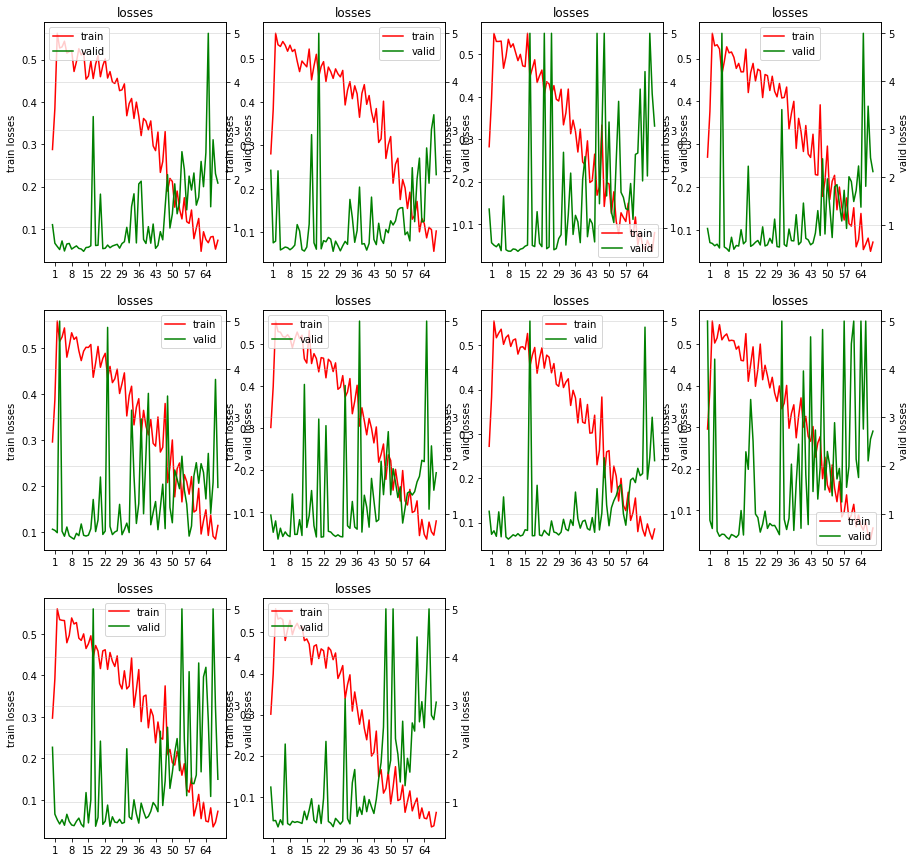

In [97]:
# ResNet3D_10 full tumor feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=25 hu=820~1120
# 不做 padding
ez_fn("./tmp/ResNet3D_10_cen/E25_no18_noExt_m4_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8162  0.8383
# Mean AUC         : 0.7833  0.7807
# Total params: 14,356,546
# Estimated Total Size (MB): 72.37
# FLOPs  =     8.9548 GFLOPs
# Params =    14.3565 MB

./tmp/ResNet3D_10_cen/E75_no18_noBalance_m4_b16_lr5e4_97-15


AUC:

best of LNM @exp5-10
loss: 0.7982    LNM     ENE  
AUC         : 0.8433  0.7038 
Accuracy    : 0.8026  0.7368 
Sensitivity : 0.6957  0.5333 
Specificity : 0.8491  0.7869 
PPV         : 0.6667  0.3810 
NPV         : 0.8654  0.8727 

best of ENE @exp8-7
loss: 0.6381    LNM     ENE  
AUC         : 0.8113  0.8590 
Accuracy    : 0.7763  0.7237 
Sensitivity : 0.6957  0.8000 
Specificity : 0.8113  0.7049 
PPV         : 0.6154  0.4000 
NPV         : 0.8600  0.9348 

best of both @exp8-7
loss: 0.6381    LNM     ENE  
AUC         : 0.8113  0.8590 
Accuracy    : 0.7763  0.7237 
Sensitivity : 0.6957  0.8000 
Specificity : 0.8113  0.7049 
PPV         : 0.6154  0.4000 
NPV         : 0.8600  0.9348 

Mean of best AUC during 10 exps
loss: 0.6357    LNM     ENE  
AUC         : 0.8126  0.8171 
Accuracy    : 0.7526  0.7474 
Sensitivity : 0.7406  0.7333 
Specificity : 0.7579  0.7508 
PPV         : 0.5834  0.4336 
NPV         : 0.8739  0.9

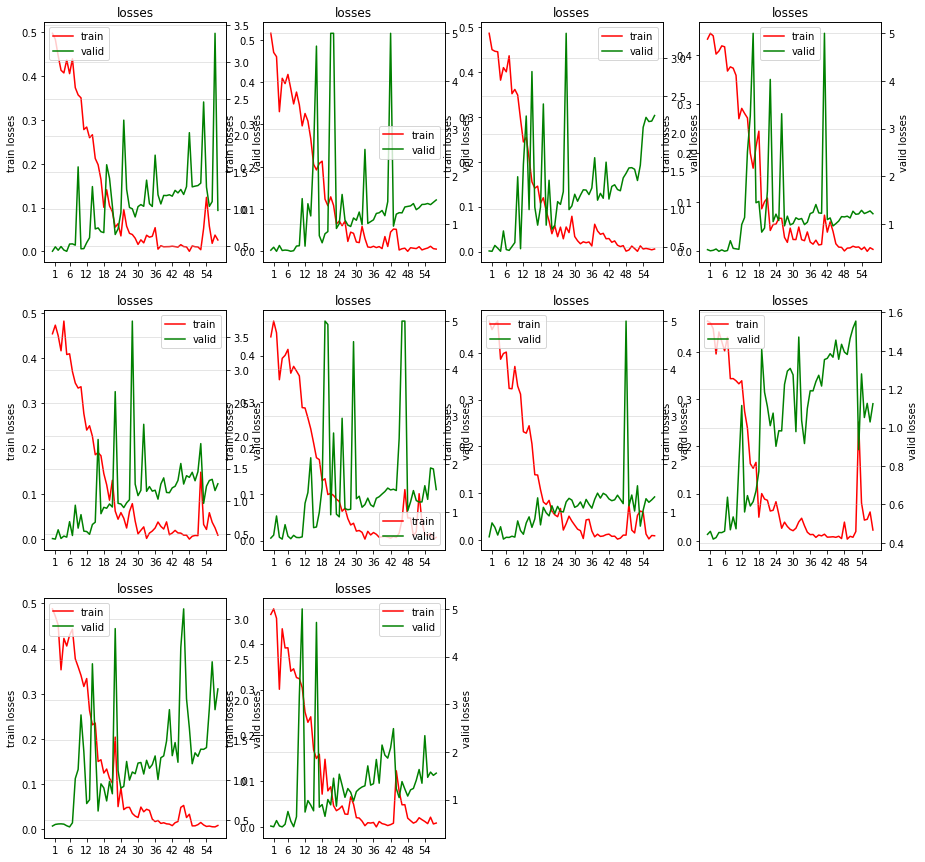

In [82]:
# ResNet3D_10 full tumor feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=25 hu=820~1120
# 不做訓練數據batch均衡 losses 不穩定
ez_fn("./tmp/ResNet3D_10_cen/E75_no18_noBalance_m4_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8113  0.8590
# Mean AUC         : 0.8126  0.8171
# Total params: 14,356,546
# Estimated Total Size (MB): 72.37
# FLOPs  =     8.9548 GFLOPs
# Params =    14.3565 MB

./tmp/ResNet3D_10_cen/E100_no18_noMul_m1_b16_lr5e4_97-15


AUC:

best of LNM @exp2-7
loss: 0.9504    LNM     ENE  
AUC         : 0.8704  0.8273 
Accuracy    : 0.8158  0.7237 
Sensitivity : 0.7826  0.8667 
Specificity : 0.8302  0.6885 
PPV         : 0.6667  0.4062 
NPV         : 0.8980  0.9545 

best of ENE @exp3-10
loss: 1.3138    LNM     ENE  
AUC         : 0.7990  0.8426 
Accuracy    : 0.7895  0.7105 
Sensitivity : 0.5217  0.9333 
Specificity : 0.9057  0.6557 
PPV         : 0.7059  0.4000 
NPV         : 0.8136  0.9756 

best of both @exp2-7
loss: 0.9504    LNM     ENE  
AUC         : 0.8704  0.8273 
Accuracy    : 0.8158  0.7237 
Sensitivity : 0.7826  0.8667 
Specificity : 0.8302  0.6885 
PPV         : 0.6667  0.4062 
NPV         : 0.8980  0.9545 

Mean of best AUC during 10 exps
loss: 1.3818    LNM     ENE  
AUC         : 0.8223  0.7995 
Accuracy    : 0.7522  0.6912 
Sensitivity : 0.7362  0.8644 
Specificity : 0.7591  0.6486 
PPV         : 0.6190  0.3838 
NPV         : 0.8835  0.9541

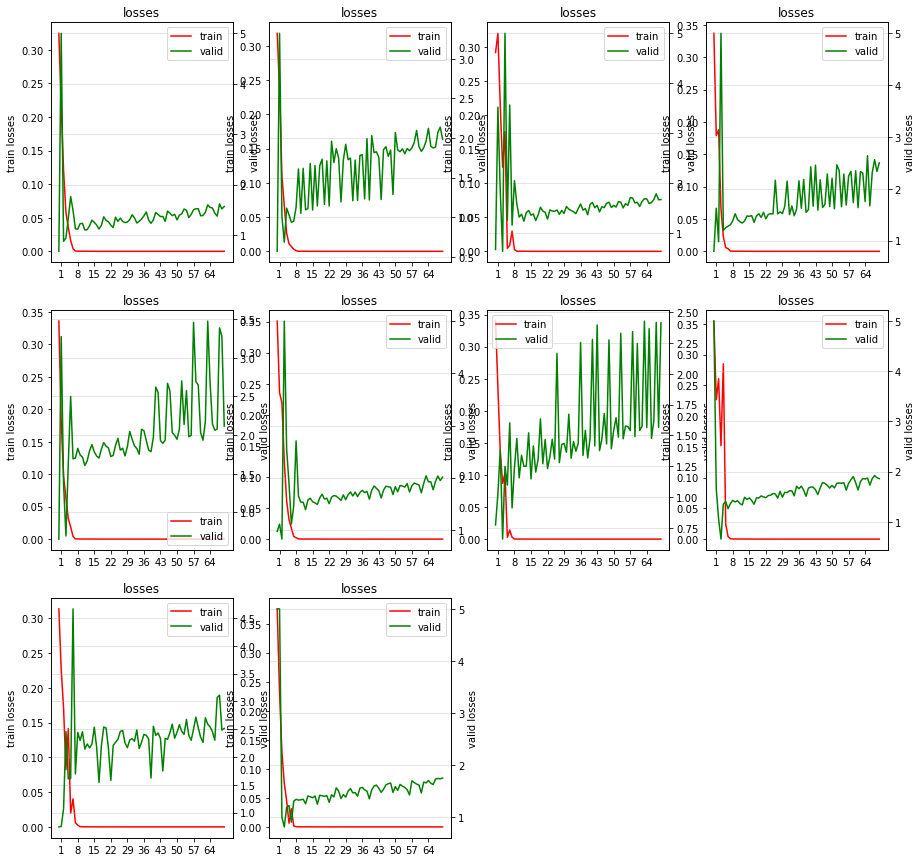

In [83]:
# ResNet3D_10 full tumor feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=25 hu=820~1120
# 不做數據增量，後面losses 可以看見明顯 over fitting
ez_fn("./tmp/ResNet3D_10_cen/E100_no18_noMul_m1_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8704  0.8273
# Mean AUC         : 0.8223  0.7995
# Total params: 14,356,546
# Estimated Total Size (MB): 72.37
# FLOPs  =     8.9548 GFLOPs
# Params =    14.3565 MB

./tmp/ResNet3D_10_cen/E8_no18_m20_b16_lr5e4_97-15


AUC:

best of LNM @exp10-105
loss: 1.2772    LNM     ENE  
AUC         : 0.8244  0.6546 
Accuracy    : 0.7500  0.7632 
Sensitivity : 0.8261  0.4667 
Specificity : 0.7170  0.8361 
PPV         : 0.5588  0.4118 
NPV         : 0.9048  0.8644 

best of ENE @exp4-96
loss: 0.6910    LNM     ENE  
AUC         : 0.7646  0.8623 
Accuracy    : 0.7237  0.7895 
Sensitivity : 0.7826  0.8000 
Specificity : 0.6981  0.7869 
PPV         : 0.5294  0.4800 
NPV         : 0.8810  0.9412 

best of both @exp9-42
loss: 0.5567    LNM     ENE  
AUC         : 0.8056  0.8514 
Accuracy    : 0.7632  0.8421 
Sensitivity : 0.6957  0.6667 
Specificity : 0.7925  0.8852 
PPV         : 0.5926  0.5882 
NPV         : 0.8571  0.9153 

Mean of best AUC during 10 exps
loss: 0.6408    LNM     ENE  
AUC         : 0.7946  0.7924 
Accuracy    : 0.7579  0.7561 
Sensitivity : 0.6739  0.7089 
Specificity : 0.7943  0.7678 
PPV         : 0.6054  0.4354 
NPV         : 0.8515  0.9196 



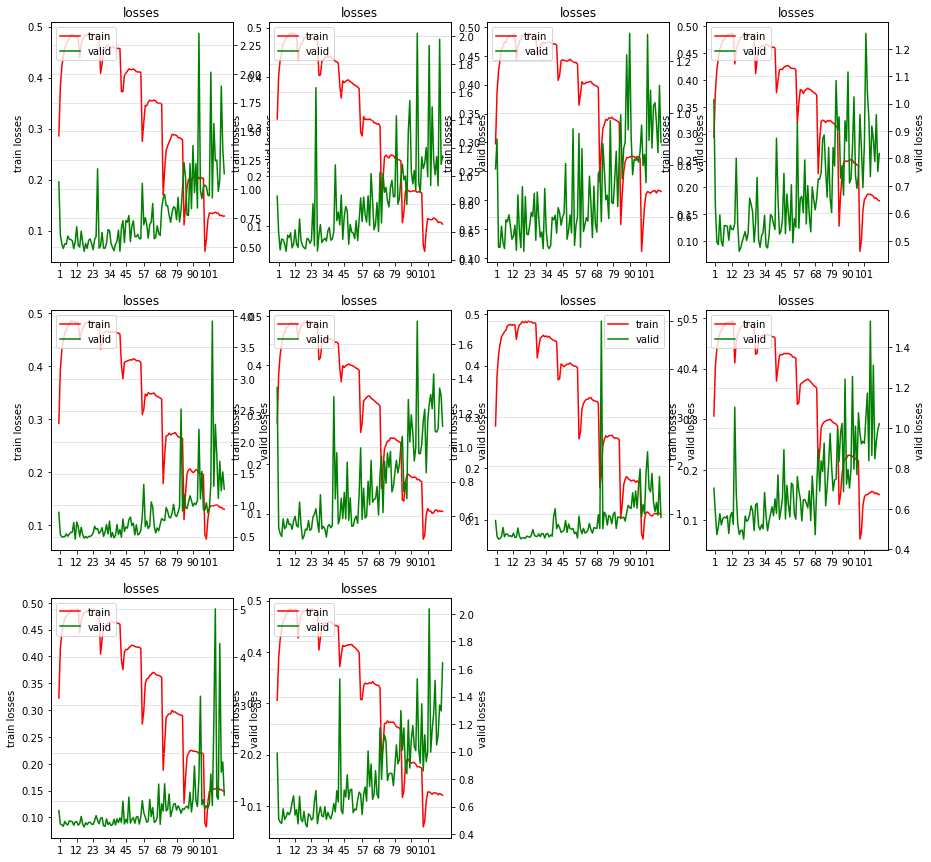

In [107]:
# ResNet3D_10 full tumor feature=2 no 2018 dataset multiple=20 batch=16 learningRate=5e-4 maxEpoch=8 hu=820~1120
# 數據增量20倍 訊練時間超長 但效果未比較好
ez_fn("./tmp/ResNet3D_10_cen/E8_no18_m20_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8056  0.8514
# Mean AUC         : 0.7946  0.7924
# Total params: 14,356,546
# Estimated Total Size (MB): 72.37
# FLOPs  =     8.9548 GFLOPs
# Params =    14.3565 MB

./tmp/ResNet3D_18_full/1E25_no18_m4_b16_lr5e4_97-15


AUC:

best of LNM @exp2-16
loss: 0.4287    LNM     ENE  
AUC         : 0.8712  0.8907 
Accuracy    : 0.8026  0.8684 
Sensitivity : 0.6957  0.8000 
Specificity : 0.8491  0.8852 
PPV         : 0.6667  0.6316 
NPV         : 0.8654  0.9474 

best of ENE @exp5-42
loss: 1.0361    LNM     ENE  
AUC         : 0.7605  0.9180 
Accuracy    : 0.6184  0.8421 
Sensitivity : 0.8696  0.8000 
Specificity : 0.5094  0.8525 
PPV         : 0.4348  0.5714 
NPV         : 0.9000  0.9455 

best of both @exp2-16
loss: 0.4287    LNM     ENE  
AUC         : 0.8712  0.8907 
Accuracy    : 0.8026  0.8684 
Sensitivity : 0.6957  0.8000 
Specificity : 0.8491  0.8852 
PPV         : 0.6667  0.6316 
NPV         : 0.8654  0.9474 

Mean of best AUC during 10 exps
loss: 0.8823    LNM     ENE  
AUC         : 0.8127  0.8553 
Accuracy    : 0.7623  0.7653 
Sensitivity : 0.6870  0.7867 
Specificity : 0.7950  0.7601 
PPV         : 0.6409  0.4692 
NPV         : 0.8617  0.9378 



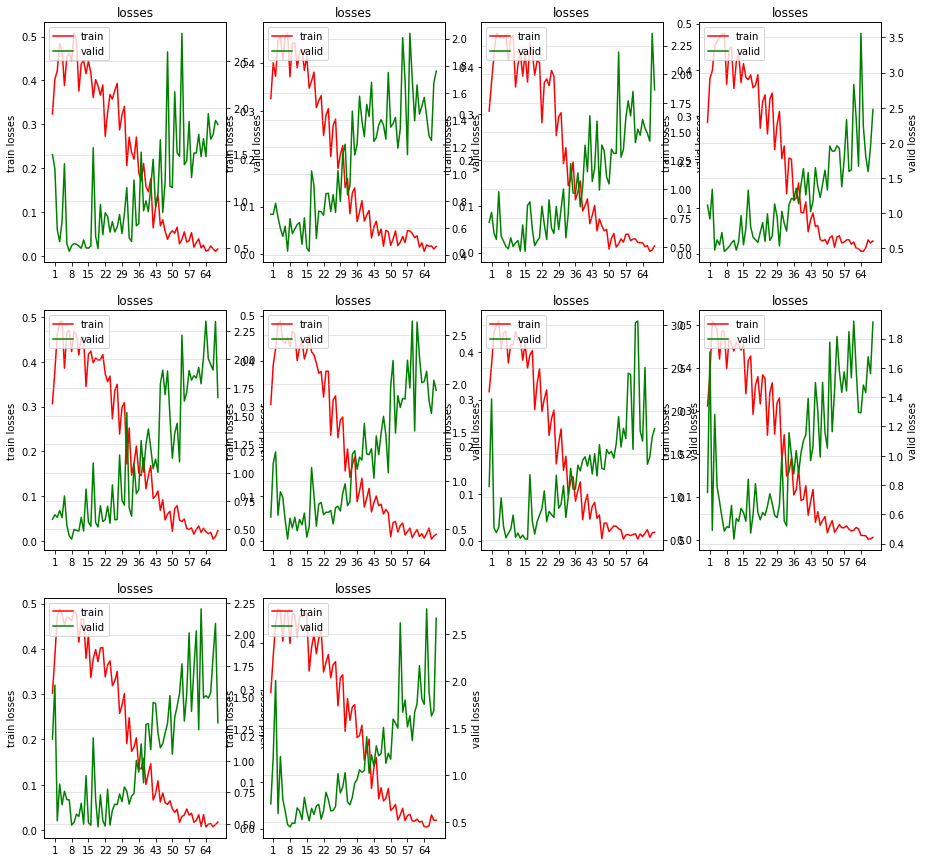

In [99]:
# ResNet3D_18 resized to 32x32x32 tumor feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=25 hu=820~1120
ez_fn("./tmp/ResNet3D_18_full/1E25_no18_m4_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8712  0.8907
# Mean AUC         : 0.8127  0.8553
# Total params: 33,161,026
# Estimated Total Size (MB):148.75
# FLOPs  =    15.7607 GFLOPs
# Params =    33.1610 MB

./tmp/ResNet3D_18_cen/2E25_no18_m4_b16_lr5e4_97-15


AUC:

best of LNM @exp6-60
loss: 0.6895    LNM     ENE  
AUC         : 0.8696  0.7978 
Accuracy    : 0.8158  0.7632 
Sensitivity : 0.6957  0.7333 
Specificity : 0.8679  0.7705 
PPV         : 0.6957  0.4400 
NPV         : 0.8679  0.9216 

best of ENE @exp1-34
loss: 0.4727    LNM     ENE  
AUC         : 0.8532  0.8984 
Accuracy    : 0.8816  0.7763 
Sensitivity : 0.6087  0.9333 
Specificity : 1.0000  0.7377 
PPV         : 1.0000  0.4667 
NPV         : 0.8548  0.9783 

best of both @exp1-34
loss: 0.4727    LNM     ENE  
AUC         : 0.8532  0.8984 
Accuracy    : 0.8816  0.7763 
Sensitivity : 0.6087  0.9333 
Specificity : 1.0000  0.7377 
PPV         : 1.0000  0.4667 
NPV         : 0.8548  0.9783 

Mean of best AUC during 10 exps
loss: 0.9044    LNM     ENE  
AUC         : 0.8297  0.8235 
Accuracy    : 0.8061  0.7570 
Sensitivity : 0.6681  0.7644 
Specificity : 0.8660  0.7552 
PPV         : 0.7088  0.4430 
NPV         : 0.8595  0.9309 




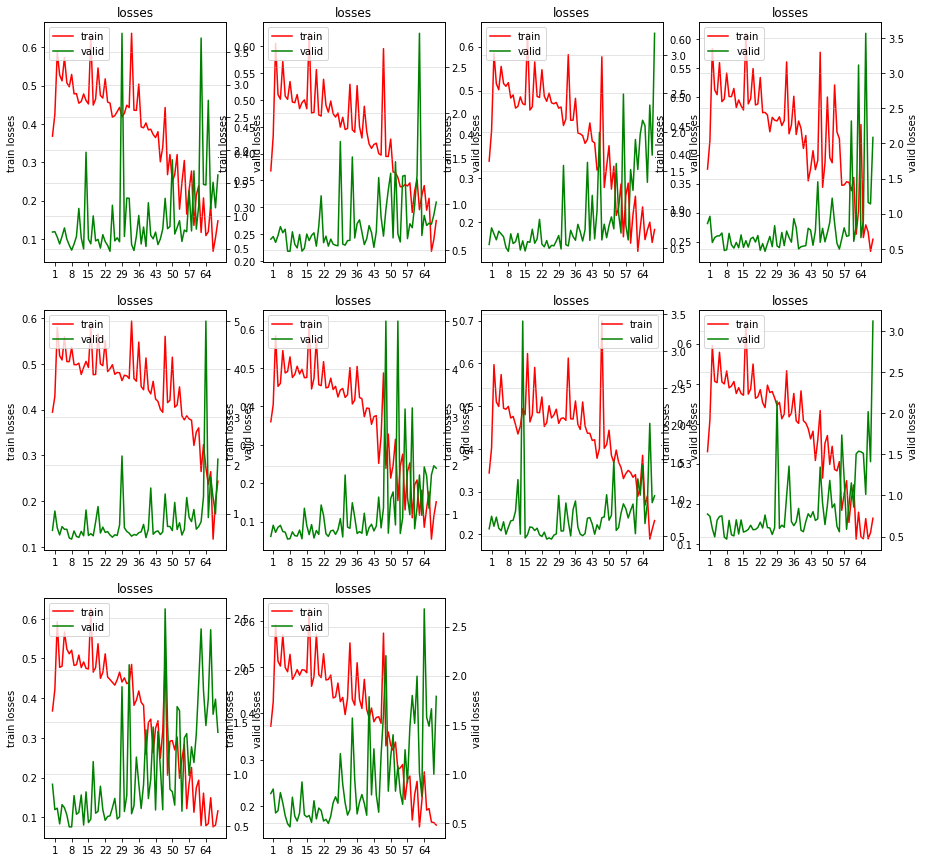

In [100]:
# ResNet3D_18 no resized 32x118x118 tumor feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=25 hu=820~1120
ez_fn("./tmp/ResNet3D_18_cen/2E25_no18_m4_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8532  0.8984
# Mean AUC         : 0.8297  0.8235
# Total params: 33,161,026
# Estimated Total Size (MB): 434.97
# FLOPs  =   224.9171 GFLOPs
# Params =    33.1610 MB

./tmp/DualResNet_18_10/no18_m4_b16_lr5e4_97-15


AUC:

best of LNM @exp2-15
loss: 1.0066    LNM     ENE  
AUC         : 0.8548  0.7432 
Accuracy    : 0.8289  0.7632 
Sensitivity : 0.6522  0.6000 
Specificity : 0.9057  0.8033 
PPV         : 0.7500  0.4286 
NPV         : 0.8571  0.8909 

best of ENE @exp4-41
loss: 1.0063    LNM     ENE  
AUC         : 0.7851  0.8885 
Accuracy    : 0.6842  0.7500 
Sensitivity : 0.7391  0.8667 
Specificity : 0.6604  0.7213 
PPV         : 0.4857  0.4333 
NPV         : 0.8537  0.9565 

best of both @exp4-41
loss: 1.0063    LNM     ENE  
AUC         : 0.7851  0.8885 
Accuracy    : 0.6842  0.7500 
Sensitivity : 0.7391  0.8667 
Specificity : 0.6604  0.7213 
PPV         : 0.4857  0.4333 
NPV         : 0.8537  0.9565 

Mean of best AUC during 10 exps
loss: 1.0958    LNM     ENE  
AUC         : 0.8087  0.8042 
Accuracy    : 0.7281  0.7548 
Sensitivity : 0.7652  0.6978 
Specificity : 0.7119  0.7689 
PPV         : 0.5595  0.4604 
NPV         : 0.8816  0.9179 



Acc

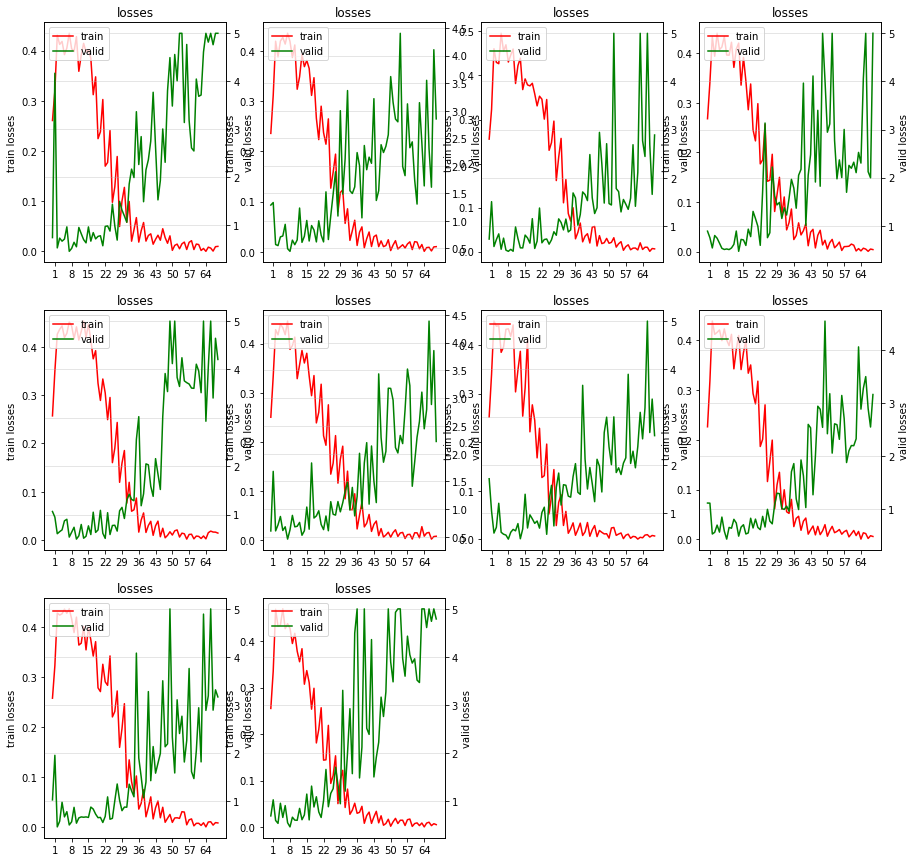

In [61]:
# DualResNet_18_10 feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=25 hu=820~1120
ez_fn("./tmp/DualResNet_18_10/no18_m4_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.7851  0.8885
# Mean AUC         : 0.8087  0.8042
# Total params: 47,523,762
# Estimated Total Size (MB): 507.36
# FLOPs  =   233.8720 GFLOPs
# Params =    47.5238 MB

./tmp/DualResNet_18_18/no18_m4_b16_lr5e4_97-15


AUC:

best of LNM @exp6-53
loss: 1.9102    LNM     ENE  
AUC         : 0.8491  0.7770 
Accuracy    : 0.7763  0.6447 
Sensitivity : 0.8261  0.8667 
Specificity : 0.7547  0.5902 
PPV         : 0.5938  0.3421 
NPV         : 0.9091  0.9474 

best of ENE @exp4-65
loss: 2.0309    LNM     ENE  
AUC         : 0.7769  0.8984 
Accuracy    : 0.7763  0.7500 
Sensitivity : 0.6522  0.9333 
Specificity : 0.8302  0.7049 
PPV         : 0.6250  0.4375 
NPV         : 0.8462  0.9773 

best of both @exp2-13
loss: 0.4347    LNM     ENE  
AUC         : 0.8368  0.8710 
Accuracy    : 0.7632  0.7895 
Sensitivity : 0.7826  0.8000 
Specificity : 0.7547  0.7869 
PPV         : 0.5806  0.4800 
NPV         : 0.8889  0.9412 

Mean of best AUC during 10 exps
loss: 0.7703    LNM     ENE  
AUC         : 0.8159  0.8190 
Accuracy    : 0.7561  0.7386 
Sensitivity : 0.7246  0.7800 
Specificity : 0.7698  0.7284 
PPV         : 0.6233  0.4421 
NPV         : 0.8732  0.9359 



Acc

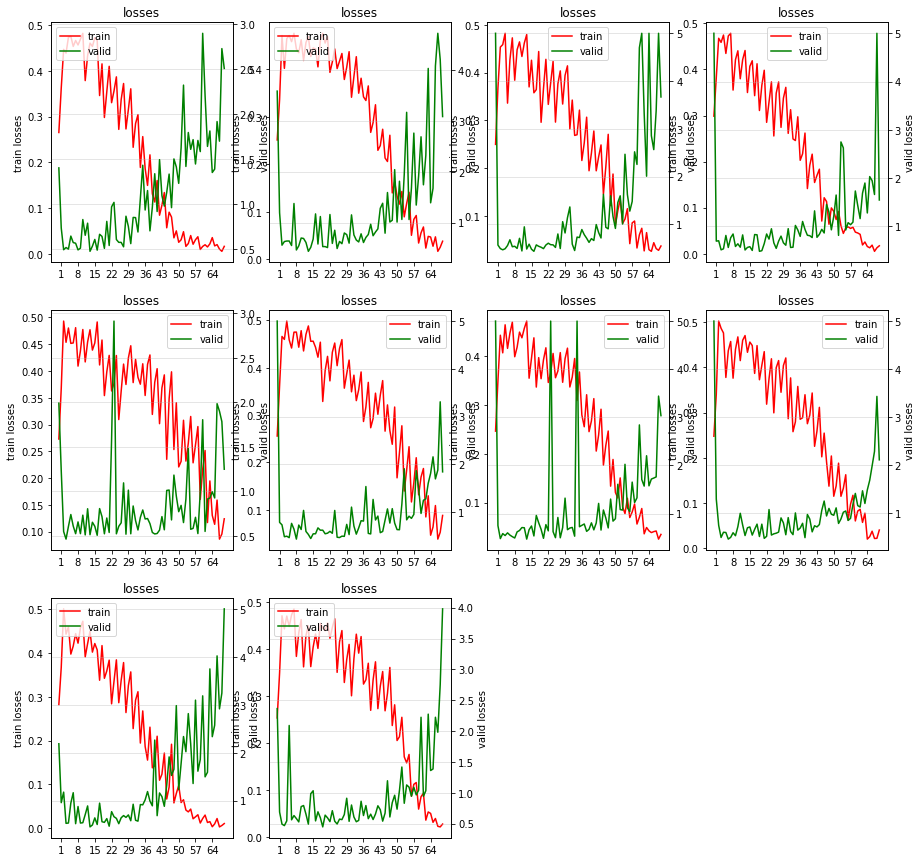

In [101]:
# DualResNet_18_10 feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=25 hu=820~1120
ez_fn("./tmp/DualResNet_18_18/no18_m4_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8368  0.8710
# Mean AUC         : 0.8159  0.8190
# Total params: 66,328,242
# Estimated Total Size (MB): 583.74
# FLOPs  =   240.6779 GFLOPs
# Params =    66.3282 MB

./tmp/DualResNet_34_18/no18_m10_b16_lr5e4_97-15


AUC:

best of LNM @exp4-30
loss: 0.4377    LNM     ENE  
AUC         : 0.8515  0.8874 
Accuracy    : 0.8289  0.8026 
Sensitivity : 0.7391  0.8000 
Specificity : 0.8679  0.8033 
PPV         : 0.7083  0.5000 
NPV         : 0.8846  0.9423 

best of ENE @exp1-27
loss: 0.4855    LNM     ENE  
AUC         : 0.8154  0.9148 
Accuracy    : 0.8026  0.8289 
Sensitivity : 0.6087  0.8667 
Specificity : 0.8868  0.8197 
PPV         : 0.7000  0.5417 
NPV         : 0.8393  0.9615 

best of both @exp4-30
loss: 0.4377    LNM     ENE  
AUC         : 0.8515  0.8874 
Accuracy    : 0.8289  0.8026 
Sensitivity : 0.7391  0.8000 
Specificity : 0.8679  0.8033 
PPV         : 0.7083  0.5000 
NPV         : 0.8846  0.9423 

Mean of best AUC during 10 exps
loss: 0.6839    LNM     ENE  
AUC         : 0.8124  0.8442 
Accuracy    : 0.7820  0.7912 
Sensitivity : 0.6638  0.7289 
Specificity : 0.8333  0.8066 
PPV         : 0.6548  0.5069 
NPV         : 0.8539  0.9255 



Ac

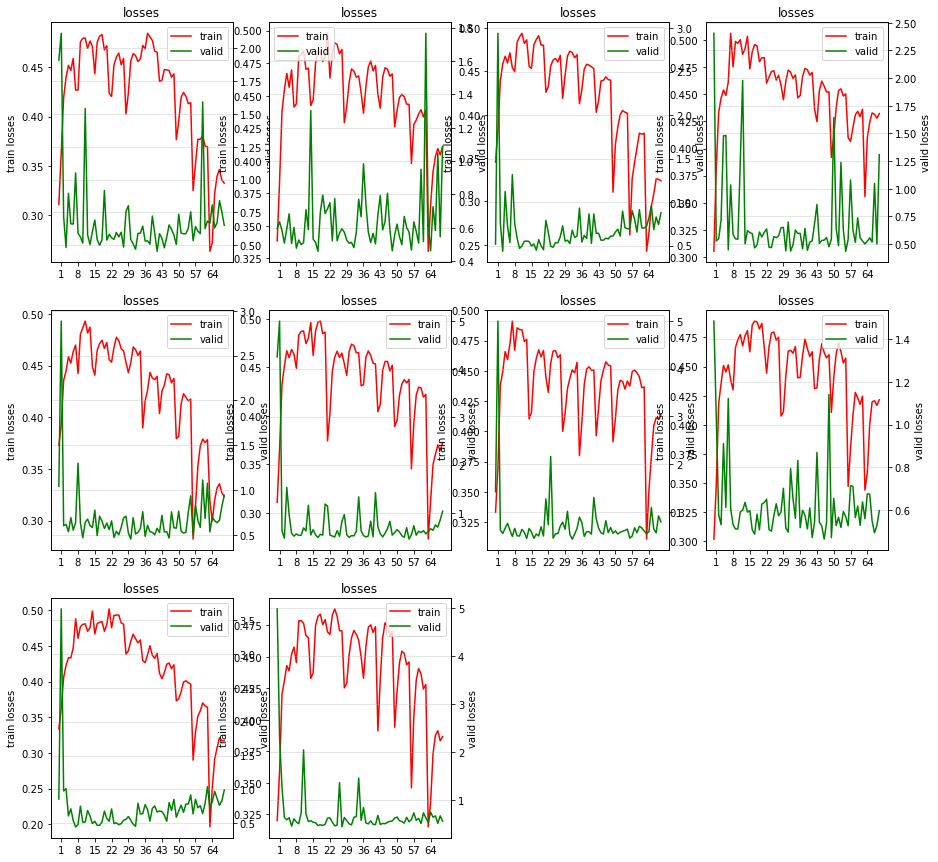

In [62]:
# DualResNet_34_18 feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=10 hu=820~1120
ez_fn("./tmp/DualResNet_34_18/no18_m10_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8515  0.8874
# Mean AUC         : 0.8124  0.8442
# Total params: 96,637,874
# Estimated Total Size (MB): 788.06
# FLOPs  =   408.0419 GFLOPs
# Params =    96.6379 MB

./tmp/DualResNet_34_18/no18_m5_b16_lr5e4_97-15


AUC:

best of LNM @exp10-4
loss: 0.9151    LNM     ENE  
AUC         : 0.8696  0.8350 
Accuracy    : 0.7763  0.7632 
Sensitivity : 0.9130  0.7333 
Specificity : 0.7170  0.7705 
PPV         : 0.5833  0.4400 
NPV         : 0.9500  0.9216 

best of ENE @exp3-24
loss: 0.5580    LNM     ENE  
AUC         : 0.8441  0.9082 
Accuracy    : 0.7632  0.8026 
Sensitivity : 0.8261  0.8667 
Specificity : 0.7358  0.7869 
PPV         : 0.5758  0.5000 
NPV         : 0.9070  0.9600 

best of both @exp3-24
loss: 0.5580    LNM     ENE  
AUC         : 0.8441  0.9082 
Accuracy    : 0.7632  0.8026 
Sensitivity : 0.8261  0.8667 
Specificity : 0.7358  0.7869 
PPV         : 0.5758  0.5000 
NPV         : 0.9070  0.9600 

Mean of best AUC during 10 exps
loss: 1.9374    LNM     ENE  
AUC         : 0.8286  0.8438 
Accuracy    : 0.7575  0.7395 
Sensitivity : 0.7522  0.7978 
Specificity : 0.7597  0.7251 
PPV         : 0.5924  0.4305 
NPV         : 0.8828  0.9389 



Acc

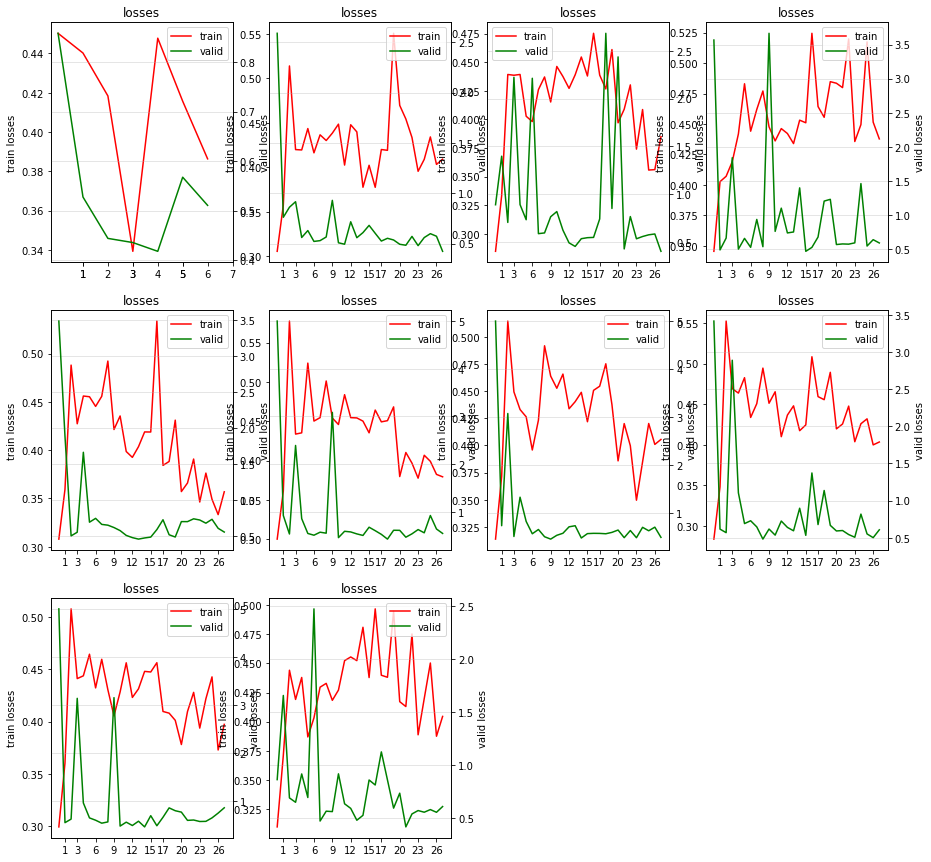

In [63]:
# DualResNet_34_18 feature=2 no 2018 dataset multiple=4 batch=16 learningRate=5e-4 maxEpoch=25 hu=820~1120
ez_fn("./tmp/DualResNet_34_18/no18_m5_b16_lr5e4_97-15")  # DONE
# Best AUC         : 0.8441  0.9082
# Mean AUC         : 0.8286  0.8438

LNM


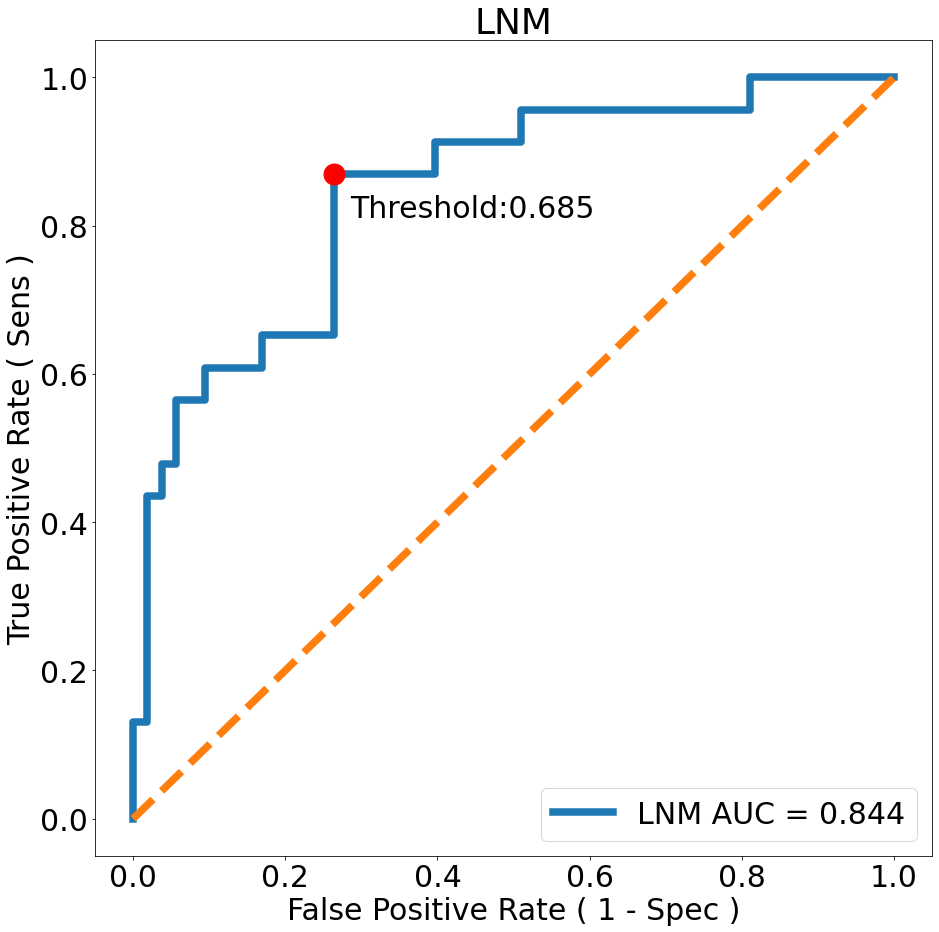

ENE


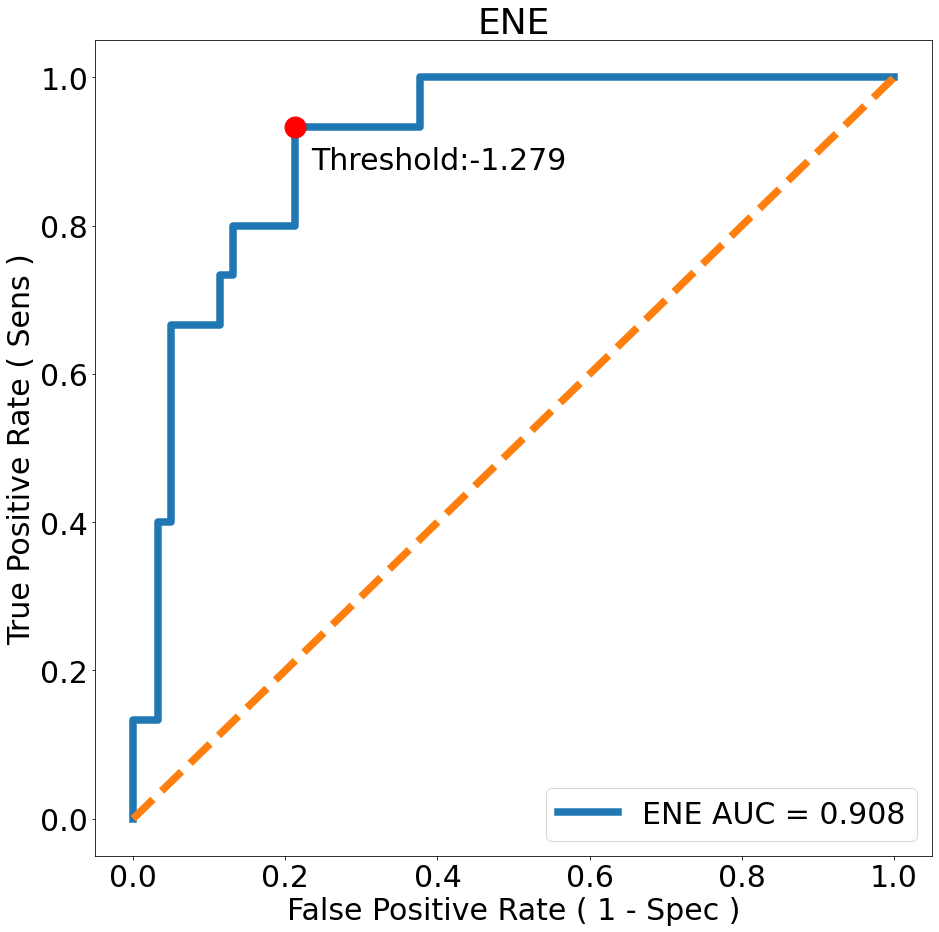

In [190]:
data = read_datas_from_json("./tmp/DualResNet_34_18/no18_m5_b16_lr5e4_97-15")
label_lnm, label_ene = zip(*data[3][24]["raw"][0])
pred_lnm, pred_ene = zip(*data[3][24]["raw"][1])

import matplotlib.pyplot as plt


def plot_ROC(label, pred, name, size=(10, 10)):
    fpr, tpr, roc_auc, optimal_th, optimal_point = ROC(label, pred)

    b_siz = (size[0] * size[1]) ** 0.5
    plt.rcParams.update({"font.size": b_siz * 2})

    print(name)
    plt.figure(figsize=size)

    plt.plot(
        fpr,
        tpr,
        label=f"{name} AUC = {roc_auc:.3f}",
        linewidth=b_siz * 0.5,
    )
    plt.plot(
        optimal_point[0],
        optimal_point[1],
        marker="o",
        color="r",
        markersize=b_siz*1.4,
    )
    plt.text(
        optimal_point[0] + 12e-3*b_siz**0.2, optimal_point[1] - 44e-3*b_siz**0.1, f"Threshold:{optimal_th:.3f}"
    )
    plt.plot([0, 1], [0, 1], linestyle="--", linewidth=(size[0] * size[1]) ** 0.5 * 0.5)
    plt.title(name)
    plt.xlabel("False Positive Rate ( 1 - Spec )")
    plt.ylabel("True Positive Rate ( Sens )")
    plt.legend(loc=4)
    plt.show()


plot_ROC(label_lnm, pred_lnm, "LNM", (15, 15))
plot_ROC(label_ene, pred_ene, "ENE", (15, 15))

./tmp/DualResNet_34_18/E25_no18_m10_b24_lr3e4_97-15


AUC:

best of LNM @exp8-14
loss: 0.5221    LNM     ENE  
AUC         : 0.8687  0.8710 
Accuracy    : 0.7500  0.7763 
Sensitivity : 0.9130  0.8000 
Specificity : 0.6792  0.7705 
PPV         : 0.5526  0.4615 
NPV         : 0.9474  0.9400 

best of ENE @exp6-16
loss: 0.5900    LNM     ENE  
AUC         : 0.7900  0.9027 
Accuracy    : 0.7368  0.7632 
Sensitivity : 0.7826  0.8667 
Specificity : 0.7170  0.7377 
PPV         : 0.5455  0.4483 
NPV         : 0.8837  0.9574 

best of both @exp4-42
loss: 0.4564    LNM     ENE  
AUC         : 0.8507  0.8962 
Accuracy    : 0.7632  0.7895 
Sensitivity : 0.8696  0.8000 
Specificity : 0.7170  0.7869 
PPV         : 0.5714  0.4800 
NPV         : 0.9268  0.9412 

Mean of best AUC during 10 exps
loss: 0.7995    LNM     ENE  
AUC         : 0.8258  0.8677 
Accuracy    : 0.7482  0.7825 
Sensitivity : 0.7638  0.7933 
Specificity : 0.7415  0.7798 
PPV         : 0.5853  0.4893 
NPV         : 0.8843  0.9407 



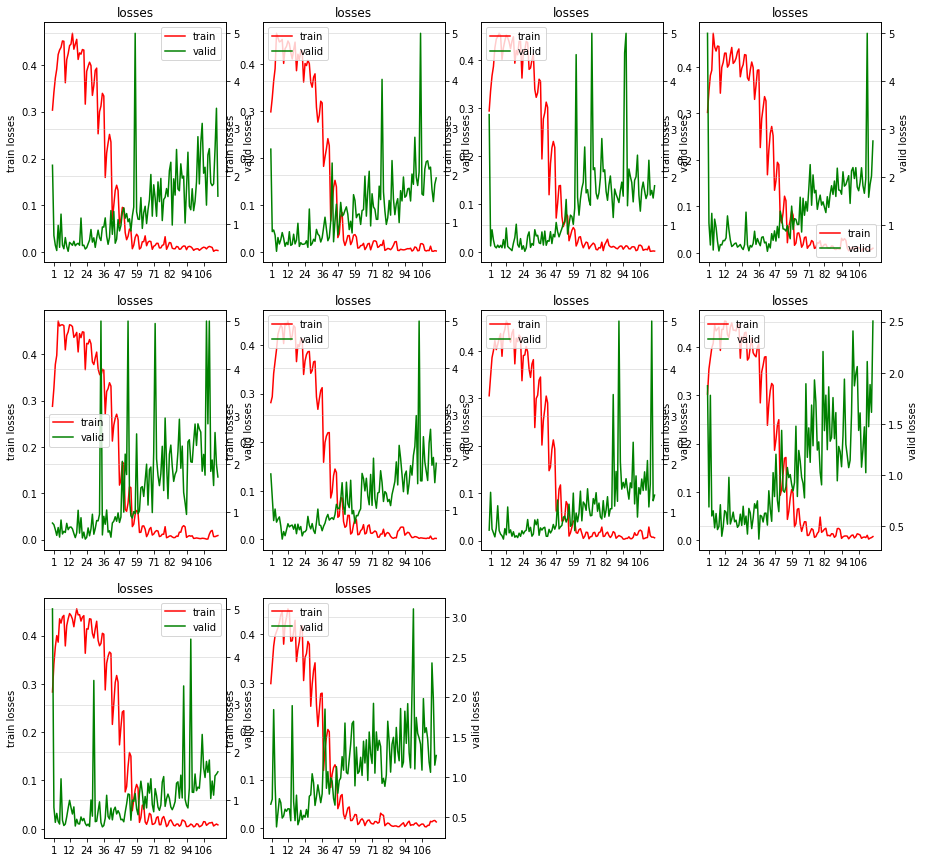

In [74]:
# DualResNet_34_18 feature=2 no 2018 dataset multiple=10 batch=16 learningRate=5e-4 maxEpoch=25 hu=820~1120
ez_fn("./tmp/DualResNet_34_18/E25_no18_m10_b24_lr3e4_97-15")  # DONE
# Best AUC         : 0.8507  0.8962
# Mean AUC         : 0.8258  0.8677